In [1]:
import os
import pandas as pd
import numpy as np
from ops.imports_ipython import *
import ops.aggregate as aggregate 

### Set directory parameters:

In [2]:
# Set screen directories
aggregate_function_home = "/lab/barcheese01/screens"
aggregate_function_dataset = "denali"
home = os.path.join(aggregate_function_home, aggregate_function_dataset)

# Change working directory to home
os.chdir(home)

# Make directories
os.makedirs("aggregate_4/hdf", exist_ok=True)
os.makedirs("aggregate_4/tif", exist_ok=True)

##### load a subset of the data

The following cell contains crucial variables that need to be set according to your specific experimental setup and data organization. Please review and modify these variables as needed before proceeding with the analysis.

- `population_feature`: The column name that identifies your perturbation groups (e.g., 'gene_symbol_0' for CRISPR screens, 'treatment' for drug screens)

Ensure these variables accurately reflect your experimental setup to guarantee correct data processing and analysis.

In [3]:
population_feature = 'gene_symbol_0'

In [4]:
# Load subset of data -- may take ~1 minute
raw_df = aggregate.load_hdf_subset('merge_3/hdf/merged_final.hdf', n_rows=50000, population_feature=population_feature)
raw_df.to_hdf('aggregate_4/hdf/final_merged_subset.hdf', key='data', mode='w')
pd.Series(raw_df.columns).to_csv('aggregate_4/column_names.csv', index=False)
print(f"Loaded {len(raw_df)} cells with {len(raw_df.columns)} features")

Reading first 50,000 rows from merge_3/hdf/merged_final.hdf
Unique populations: 4668
well
B3    8557
B1    8479
B2    8463
A2    8365
A1    8333
A3    7803
Name: count, dtype: int64


/tmp/ipykernel_4066385/628507742.py:3: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['well', 'tile', 'cell_0', 'site', 'cell_1', 'sgRNA_0', 'gene_symbol_0',
       'mapped_single_gene'],
      dtype='object')]

  raw_df.to_hdf('aggregate_4/hdf/final_merged_subset.hdf', key='data', mode='w')


Loaded 50000 cells with 1683 features


##### remove unassigned cells

In [5]:
clean_df = aggregate.clean_cell_data(raw_df, population_feature, filter_single_gene=False)
del raw_df

Found 22276 cells with assigned perturbations


##### apply feature transformations

The following cell contains crucial variables that need to be set according to your specific experimental setup and data organization. Please review and modify these variables as needed before proceeding with the analysis.

- `transformations`: CSV file containing feature transformation specifications. Each row defines a feature pattern and its transformation (e.g., 'log(feature)', 'log(feature-1)'), and should have a feature and transformation column
- `channels`: List of channels to apply feature transformations to (used to expand feature patterns like 'cell_{channel}_haralick_5_0')

Ensure these variables accurately reflect your experimental setup to guarantee correct data processing and analysis.

In [6]:
transformations = pd.read_csv('aggregate_4/transformations.csv')
channels = ['dapi', 'cenpa', 'coxiv', 'wga']

In [7]:
transformed_df = aggregate.feature_transform(
    clean_df, 
    transformations, 
    channels
)
transformed_df

/lab/barcheese01/mdiberna/OpticalPooledScreens/venv_ops_new/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,well,tile,cell_0,i_0,j_0,site,cell_1,i_1,j_1,distance,...,cell_number_neighbors_1,cell_percent_touching_1,cell_first_neighbor_distance,cell_second_neighbor_distance,cell_angle_between_neighbors,cytoplasm_number_neighbors_1,cytoplasm_percent_touching_1,cytoplasm_first_neighbor_distance,cytoplasm_second_neighbor_distance,cytoplasm_angle_between_neighbors
8,B3,315,430,1479.422074,1478.203880,88,256,99.185629,99.862275,0.323345,...,0,0.000000,89.698038,102.197643,30.230493,0.0,0.000000,83.031695,94.507309,36.213157
10,B3,155,479,1482.150198,1480.408696,25,1706,669.698795,671.012048,0.137421,...,0,0.000000,56.719075,59.884922,96.311113,0.0,0.000000,58.996134,60.208446,81.681271
15,B1,114,545,1480.846879,1477.808598,29,252,100.174757,98.000000,0.187575,...,1,0.233083,51.744197,71.255125,104.456574,1.0,0.135371,52.842614,76.753835,100.031206
20,B1,597,436,1479.251648,1477.600000,155,210,100.600000,669.250000,0.139653,...,0,0.000000,51.728772,53.681662,168.658189,0.0,0.000000,55.227556,60.331332,160.125690
21,B3,820,606,1482.022972,1478.489591,179,2236,669.363636,671.397727,0.288507,...,0,0.000000,64.158910,78.609529,170.469065,0.0,0.000000,68.906655,69.408357,167.824545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,B2,105,517,1430.538905,1379.753602,25,246,87.241379,645.954023,0.332579,...,0,0.000000,70.273751,76.662949,64.379497,0.0,0.000000,64.969906,74.376463,177.952343
49986,B3,27,1014,1448.527700,1587.264789,9,400,91.873239,697.309859,0.235081,...,2,0.186170,48.178829,54.703588,145.111589,2.0,0.117155,42.166816,62.412363,144.283889
49987,B1,1526,461,1376.948210,1436.677075,365,1658,644.500000,90.500000,0.330183,...,0,0.000000,55.455152,92.539967,93.544973,0.0,0.000000,58.488852,98.236570,88.594534
49996,A3,282,366,1407.175931,1564.829226,65,1555,653.271028,121.495327,0.456210,...,0,0.000000,66.668741,108.773476,47.054285,0.0,0.000000,76.087532,110.873713,45.876464


##### standardize features

The following cell contains crucial variables that need to be set according to your specific experimental setup and data organization. Please review and modify these variables as needed before proceeding with the analysis.

- `control_prefix`: Prefix identifying control populations
- `group_columns`: Columns defining experimental groups (e.g., ['well'] for per-well standardization)
- `index_columns`: Columns uniquely identifying cells (e.g., ['tile', 'cell_0'])
- `cat_columns`: Categorical columns to preserve
- `feature_start`: First column containing measured features


We provide a useful function for suggesting these parameters, `suggest_parameters`. Ensure these variables accurately reflect your experimental setup to guarantee correct data processing and analysis.

In [8]:
aggregate.suggest_parameters(clean_df, population_feature)


Suggested Parameters:
--------------------------------------------------

Potential control prefixes found:
  - 'nontargeting'
  - 'TNNT2'
  - 'FNTB'
  - 'CNTROB'
  - 'KNTC1'
  - 'MNT'
  - 'INTS7'
  - 'INTS12'
  - 'INTS10'
  - 'CCNT1'
  - 'INTS5'
  - 'FNTA'
  - 'NTF4'
  - 'INTS13'
  - 'INTS2'
  - 'INTS8'
  - 'INTS9'
  - 'INTS1'
  - 'TENT4B'
  - 'BPNT1'
  - 'B3GNT3'
  - 'NT5C3B'
  - 'RINT1'
  - 'PCNT'
  - 'ANTXRL'
  - 'INTS14'
  - 'INTS6'
  - 'SPINT1'
  - 'TRNT1'
  - 'NT5C'
  - 'CNTNAP1'
  - 'ARNTL2'
  - 'DNTTIP2'
  - 'ZWINT'
  - 'INTS3'
  - 'NTF3'
  - 'TNNT1'

First few feature columns detected:
  - 'nucleus_dapi_mean'
  - 'nucleus_cenpa_mean'
  - 'nucleus_coxiv_mean'
  - 'nucleus_wga_mean'
  - 'nucleus_dapi_std'

Metadata columns detected:
  - Categorical: well, tile, cell_0, site, cell_1


In [9]:
control_prefix = 'nontargeting'
group_columns = ['well']
index_columns = ['tile', 'cell_0']
cat_columns = ['gene_symbol_0', 'sgRNA_0']
feature_start = 'nucleus_dapi_mean'

In [10]:
# Identify features to standardize (all columns after mapped_single_gene)
feature_start_idx = transformed_df.columns.get_loc(feature_start)
target_features = transformed_df.columns[feature_start_idx:].tolist()
# Standardize the data
standardized_df = aggregate.grouped_standardization(
    transformed_df,
    population_feature=population_feature,
    control_prefix=control_prefix,
    group_columns=group_columns,
    index_columns=index_columns,
    cat_columns=cat_columns,
    target_features=target_features,
    drop_features=False
)
standardized_df

,well,tile,cell_0,i_0,j_0,site,cell_1,i_1,j_1,distance,...,cell_number_neighbors_1,cell_percent_touching_1,cell_first_neighbor_distance,cell_second_neighbor_distance,cell_angle_between_neighbors,cytoplasm_number_neighbors_1,cytoplasm_percent_touching_1,cytoplasm_first_neighbor_distance,cytoplasm_second_neighbor_distance,cytoplasm_angle_between_neighbors
0,B3,315,430,1479.422074,1478.203880,88,256,99.185629,99.862275,0.323345,...,NaN,NaN,3.406681,2.694308,-2.098684,NaN,NaN,1.991549,2.223249,-1.698299
1,B3,155,479,1482.150198,1480.408696,25,1706,669.698795,671.012048,0.137421,...,NaN,NaN,-0.029332,-0.561186,-0.525710,NaN,NaN,0.022799,-0.640254,-0.748806
2,B1,114,545,1480.846879,1477.808598,29,252,100.174757,98.000000,0.187575,...,inf,inf,-0.661367,0.095908,-0.226993,inf,inf,-0.478528,0.480550,-0.316765
3,B1,597,436,1479.251648,1477.600000,155,210,100.600000,669.250000,0.139653,...,NaN,NaN,-0.662743,-1.147783,1.121759,NaN,NaN,-0.296886,-0.931127,0.867259
4,B3,820,606,1482.022972,1478.489591,179,2236,669.363636,671.397727,0.288507,...,NaN,NaN,0.745809,0.879464,1.239536,NaN,NaN,0.834569,0.127818,1.050090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22271,B2,105,517,1430.538905,1379.753602,25,246,87.241379,645.954023,0.332579,...,NaN,NaN,1.114276,0.951393,-0.544651,NaN,NaN,0.713036,0.785492,1.395369
22272,B3,27,1014,1448.527700,1587.264789,9,400,91.873239,697.309859,0.235081,...,inf,inf,-0.919124,-0.959833,0.635930,inf,inf,-1.355689,-0.456256,0.558500
22273,B1,1526,461,1376.948210,1436.677075,365,1658,644.500000,90.500000,0.330183,...,NaN,NaN,-0.330307,1.602256,-0.456225,NaN,NaN,-0.048498,2.327205,-0.542098
22274,A3,282,366,1407.175931,1564.829226,65,1555,653.271028,121.495327,0.456210,...,NaN,NaN,0.643037,3.113896,-1.140289,NaN,NaN,1.450702,3.257922,-1.136923


##### add file names

The following cell contains crucial variables that need to be set according to your specific experimental setup and data organization. Please review and modify these variables as needed before proceeding with the analysis.

- `channel_dict`: Maps fluorescence channels to their corresponding image files
- `base_ph_file_path`: Points to the "input_ph_tif" folder in your home directory

Ensure these variables accurately reflect your experimental setup to guarantee correct data processing and analysis.

In [11]:
channel_dict = None
base_ph_file_path = os.path.join(home, "input_ph_tif")

In [12]:
standardized_df = aggregate.add_filenames(standardized_df,base_ph_file_path=base_ph_file_path,multichannel_dict=channel_dict)
standardized_df

,well,tile,cell_0,i_0,j_0,site,cell_1,i_1,j_1,distance,...,cell_percent_touching_1,cell_first_neighbor_distance,cell_second_neighbor_distance,cell_angle_between_neighbors,cytoplasm_number_neighbors_1,cytoplasm_percent_touching_1,cytoplasm_first_neighbor_distance,cytoplasm_second_neighbor_distance,cytoplasm_angle_between_neighbors,filename
0,B3,315,430,1479.422074,1478.203880,88,256,99.185629,99.862275,0.323345,...,NaN,3.406681,2.694308,-2.098684,NaN,NaN,1.991549,2.223249,-1.698299,/lab/barcheese01/screens/denali/input_ph_tif/2...
1,B3,155,479,1482.150198,1480.408696,25,1706,669.698795,671.012048,0.137421,...,NaN,-0.029332,-0.561186,-0.525710,NaN,NaN,0.022799,-0.640254,-0.748806,/lab/barcheese01/screens/denali/input_ph_tif/2...
2,B1,114,545,1480.846879,1477.808598,29,252,100.174757,98.000000,0.187575,...,inf,-0.661367,0.095908,-0.226993,inf,inf,-0.478528,0.480550,-0.316765,/lab/barcheese01/screens/denali/input_ph_tif/2...
3,B1,597,436,1479.251648,1477.600000,155,210,100.600000,669.250000,0.139653,...,NaN,-0.662743,-1.147783,1.121759,NaN,NaN,-0.296886,-0.931127,0.867259,/lab/barcheese01/screens/denali/input_ph_tif/2...
4,B3,820,606,1482.022972,1478.489591,179,2236,669.363636,671.397727,0.288507,...,NaN,0.745809,0.879464,1.239536,NaN,NaN,0.834569,0.127818,1.050090,/lab/barcheese01/screens/denali/input_ph_tif/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22271,B2,105,517,1430.538905,1379.753602,25,246,87.241379,645.954023,0.332579,...,NaN,1.114276,0.951393,-0.544651,NaN,NaN,0.713036,0.785492,1.395369,/lab/barcheese01/screens/denali/input_ph_tif/2...
22272,B3,27,1014,1448.527700,1587.264789,9,400,91.873239,697.309859,0.235081,...,inf,-0.919124,-0.959833,0.635930,inf,inf,-1.355689,-0.456256,0.558500,/lab/barcheese01/screens/denali/input_ph_tif/2...
22273,B1,1526,461,1376.948210,1436.677075,365,1658,644.500000,90.500000,0.330183,...,NaN,-0.330307,1.602256,-0.456225,NaN,NaN,-0.048498,2.327205,-0.542098,/lab/barcheese01/screens/denali/input_ph_tif/2...
22274,A3,282,366,1407.175931,1564.829226,65,1555,653.271028,121.495327,0.456210,...,NaN,0.643037,3.113896,-1.140289,NaN,NaN,1.450702,3.257922,-1.136923,/lab/barcheese01/screens/denali/input_ph_tif/2...


##### split mitotic and interphase data

The following cell contains crucial variables that need to be set according to your specific experimental setup and data organization. Please review and modify these variables as needed before proceeding with the analysis.

- `mitotic_threshold_variable`: Column name used to identify mitotic cells (e.g., 'nucleus_dapi_median' for DAPI intensity)
- `mitotic_threshold`: Numerical threshold to separate mitotic from interphase cells (examine intensity histogram to determine appropriate value)

Ensure these variables accurately reflect your experimental setup to guarantee correct data processing and analysis. Trying different approaches, splitting the data by more than one variable may be best.

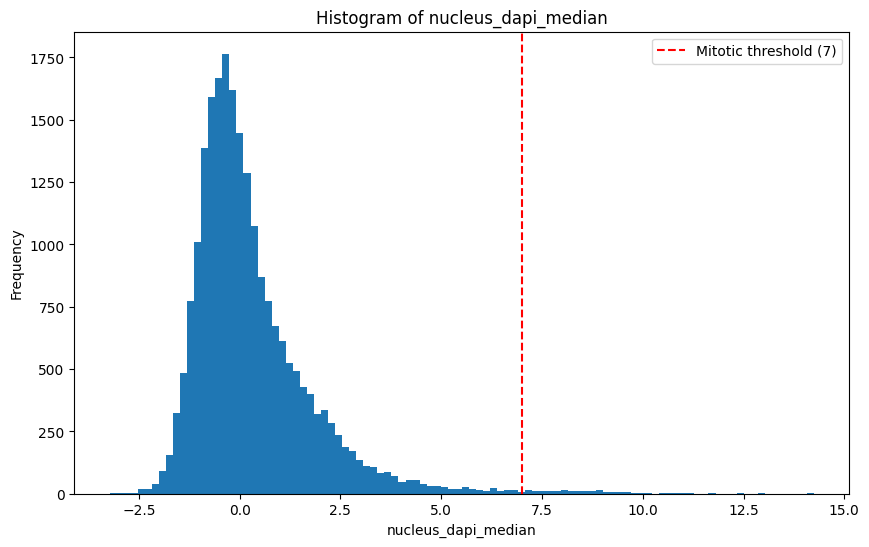

Number of mitotic cells: 183
Total cells: 22,276
Percent mitotic: 0.82%


In [13]:
mitotic_threshold_variable = 'nucleus_dapi_median'
mitotic_threshold = 7

percent_mitotic = aggregate.plot_mitotic_distribution_hist(
    standardized_df, 
    threshold_variable=mitotic_threshold_variable,
    threshold_value=mitotic_threshold
)

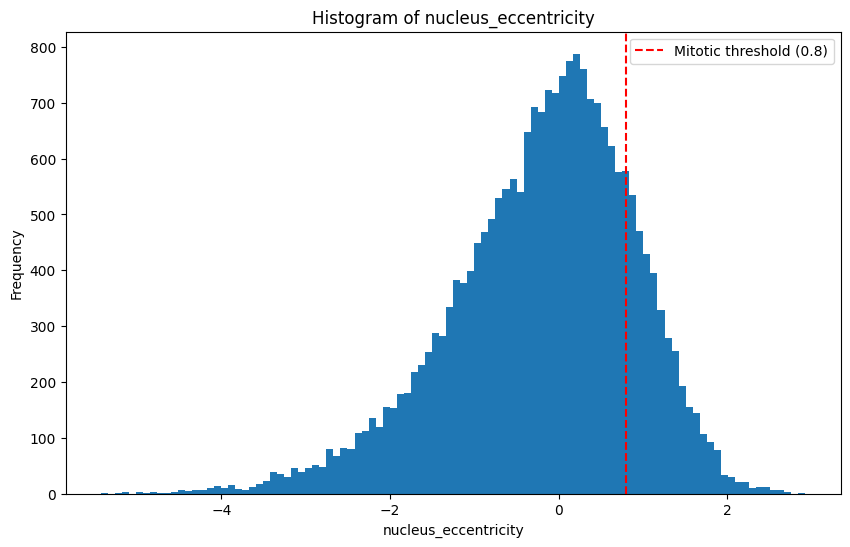

Number of mitotic cells: 3,891
Total cells: 22,276
Percent mitotic: 17.47%


In [14]:
mitotic_threshold_variable = 'nucleus_eccentricity'
mitotic_threshold = 0.8

percent_mitotic = aggregate.plot_mitotic_distribution_hist(
    standardized_df, 
    threshold_variable=mitotic_threshold_variable,
    threshold_value=mitotic_threshold
)

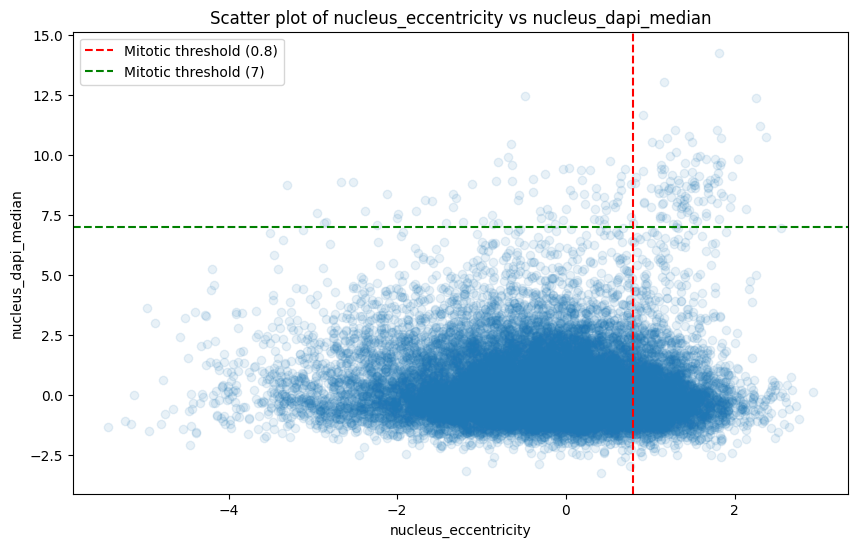

Number of mitotic cells: 108
Total cells: 22,276
Percent mitotic: 0.48%


In [15]:
threshold_variable_x = 'nucleus_eccentricity'
threshold_variable_y = 'nucleus_dapi_median'
threshold_value_x = 0.8
threshold_value_y = 7

aggregate.plot_mitotic_distribution_scatter(
    standardized_df,
    threshold_variable_x=threshold_variable_x,
    threshold_variable_y=threshold_variable_y,
    threshold_x=threshold_value_x,
    threshold_y=threshold_value_y,
    alpha=0.1
)

In [16]:
mitotic_threshold_variable = 'nucleus_dapi_median'
mitotic_threshold = 7

conditions = {
    mitotic_threshold_variable: (mitotic_threshold, 'greater'),
}
mitotic_df, interphase_df = aggregate.split_mitotic_simple(standardized_df, conditions)
print(f"Subsetting {len(mitotic_df)} mitotic cells and {len(interphase_df)} interphase cells")

Subsetting 183 mitotic cells and 22093 interphase cells


##### generate montages of mitotic and interphase cells

In [17]:
plotting_dict = {
    'dapi': {'filename': 'filename', 'channel': 0},
    'cenpa': {'filename': 'filename', 'channel': 1},
    'coxiv': {'filename': 'filename', 'channel': 2},
    'wga': {'filename': 'filename', 'channel': 3}
}

display_ranges = {
    'dapi': [(0, 14000)],
    'cenpa': [(0, 13000)],
    'coxiv': [(0, 6000)],
    'wga': [(350, 2000)]
}

# Default
aggregate.create_mitotic_cell_montage(
    df=mitotic_df,
    output_dir='aggregate_4/tif',
    output_prefix='mitotic',
    channels=plotting_dict,
    display_ranges=display_ranges
)

# Sorted by median dapi intensity
aggregate.create_mitotic_cell_montage(
    df=mitotic_df,
    output_dir='aggregate_4/tif',
    output_prefix='mitotic_sorted_nucleus_dapi_median',
    channels=plotting_dict,
    display_ranges=display_ranges,
    selection_params={
        'method': 'sorted',
        'sort_by': 'nucleus_dapi_median',
        'ascending': True
    }
)

Saved dapi montage to aggregate_4/tif/mitotic_dapi.tif
Saved cenpa montage to aggregate_4/tif/mitotic_cenpa.tif
Saved coxiv montage to aggregate_4/tif/mitotic_coxiv.tif
Saved wga montage to aggregate_4/tif/mitotic_wga.tif
Saved dapi montage to aggregate_4/tif/mitotic_sorted_nucleus_dapi_median_dapi.tif
Saved cenpa montage to aggregate_4/tif/mitotic_sorted_nucleus_dapi_median_cenpa.tif
Saved coxiv montage to aggregate_4/tif/mitotic_sorted_nucleus_dapi_median_coxiv.tif
Saved wga montage to aggregate_4/tif/mitotic_sorted_nucleus_dapi_median_wga.tif


##### re-standardize mitotic and interphase data

In [18]:
# Re-standardize mitotic population
mitotic_standardized_df = aggregate.grouped_standardization(
    mitotic_df,
    population_feature=population_feature,
    control_prefix=control_prefix,
    group_columns=group_columns,
    index_columns=index_columns,
    cat_columns=cat_columns,
    target_features=target_features,
    drop_features=True
)

# Re-standardize interphase population
interphase_standardized_df = aggregate.grouped_standardization(
    interphase_df,
    population_feature=population_feature,
    control_prefix=control_prefix,
    group_columns=group_columns,
    index_columns=index_columns,
    cat_columns=cat_columns,
    target_features=target_features,
    drop_features=True
)

##### collapse to guide rna

In [19]:
mitotic_sgrna_df = aggregate.collapse_to_sgrna(
    mitotic_standardized_df,
    method='median',
    target_features=target_features,
    index_features=[population_feature, 'sgRNA_0'],
    control_prefix=control_prefix
)

interphase_sgrna_df = aggregate.collapse_to_sgrna(
    interphase_standardized_df,
    method='median',
    target_features=target_features,
    index_features=[population_feature, 'sgRNA_0'],
    control_prefix=control_prefix
)

Multiple control guides not found. Renaming to ensure uniqueness.
Multiple control guides not found. Renaming to ensure uniqueness.


##### collapse to gene

In [20]:
mitotic_gene_df = aggregate.collapse_to_gene(
    mitotic_sgrna_df,
    target_features=target_features,
    index_features=[population_feature]
)

interphase_gene_df = aggregate.collapse_to_gene(
    interphase_sgrna_df,
    target_features=target_features,
    index_features=[population_feature]
)

##### return summary of dataset

In [21]:
summary = pd.DataFrame({
    'Stage': ['Raw Data', 'Mitotic Cells', 'Interphase Cells',
              'Mitotic sgRNAs', 'Interphase sgRNAs',
              'Mitotic Genes', 'Interphase Genes'],
    'Count': [len(clean_df), len(mitotic_df), len(interphase_df),
              len(mitotic_sgrna_df), len(interphase_sgrna_df),
              len(mitotic_gene_df), len(interphase_gene_df)]
})
print("\nAnalysis Summary of Data Subset:")
print(summary)


Analysis Summary of Data Subset:
               Stage  Count
0           Raw Data  22276
1      Mitotic Cells    183
2   Interphase Cells  22093
3     Mitotic sgRNAs    178
4  Interphase sgRNAs  10353
5      Mitotic Genes    177
6   Interphase Genes   4828
